In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("traffic.csv")
data = data.set_index(['Date'])
data

,traffic
Date,
2012-10-01,1339
2012-10-02,1462
2012-10-03,1702
2012-10-04,1656
2012-10-05,1439
...,...
2014-02-08,1341
2014-02-09,1679
2014-02-10,1823


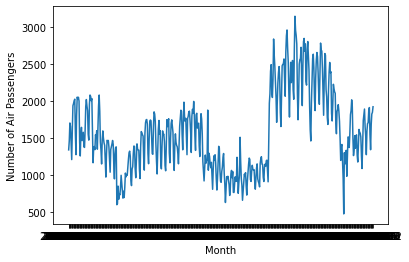

In [3]:
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

In [4]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

                traffic
Date                   
2012-10-01          NaN
2012-10-02          NaN
2012-10-03          NaN
2012-10-04          NaN
2012-10-05          NaN
2012-10-06          NaN
2012-10-07          NaN
2012-10-08          NaN
2012-10-09          NaN
2012-10-10          NaN
2012-10-11          NaN
2012-10-12  1658.583333
2012-10-13  1653.166667
2012-10-14  1681.750000
2012-10-15  1710.833333
               traffic
Date                  
2012-10-01         NaN
2012-10-02         NaN
2012-10-03         NaN
2012-10-04         NaN
2012-10-05         NaN
2012-10-06         NaN
2012-10-07         NaN
2012-10-08         NaN
2012-10-09         NaN
2012-10-10         NaN
2012-10-11         NaN
2012-10-12  274.195504
2012-10-13  281.624132
2012-10-14  277.838778
2012-10-15  297.706944


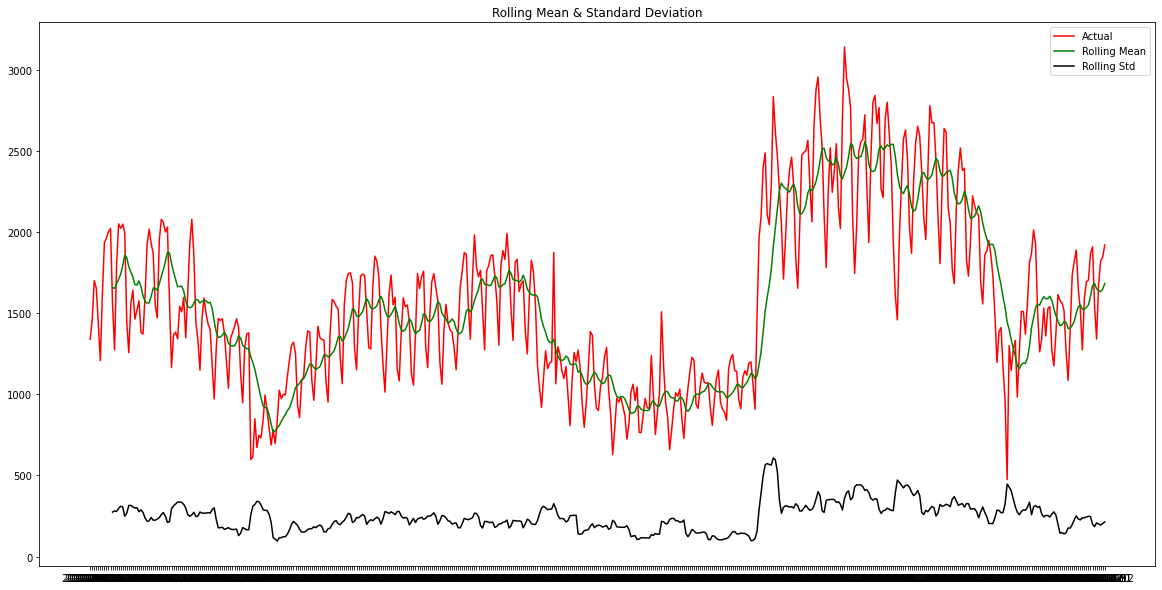

In [5]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [6]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['traffic'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -1.874616
p-value                   0.344095
Lags Used                16.000000
No. of Obs              483.000000
Critical Value (1%)      -3.443962
Critical Value (5%)      -2.867543
Critical Value (10%)     -2.569967
dtype: float64


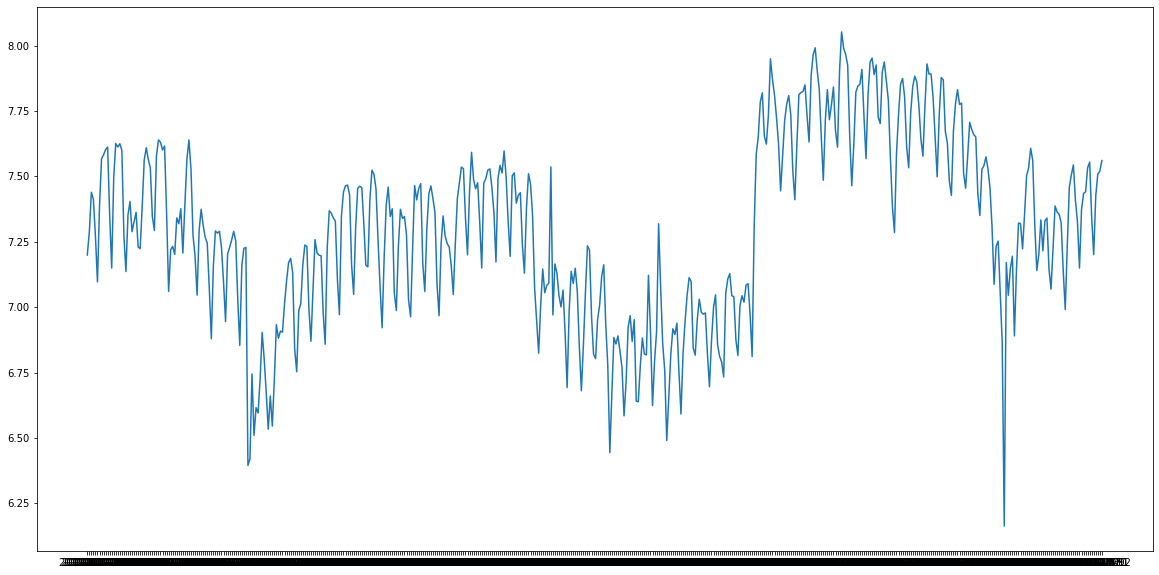

In [7]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

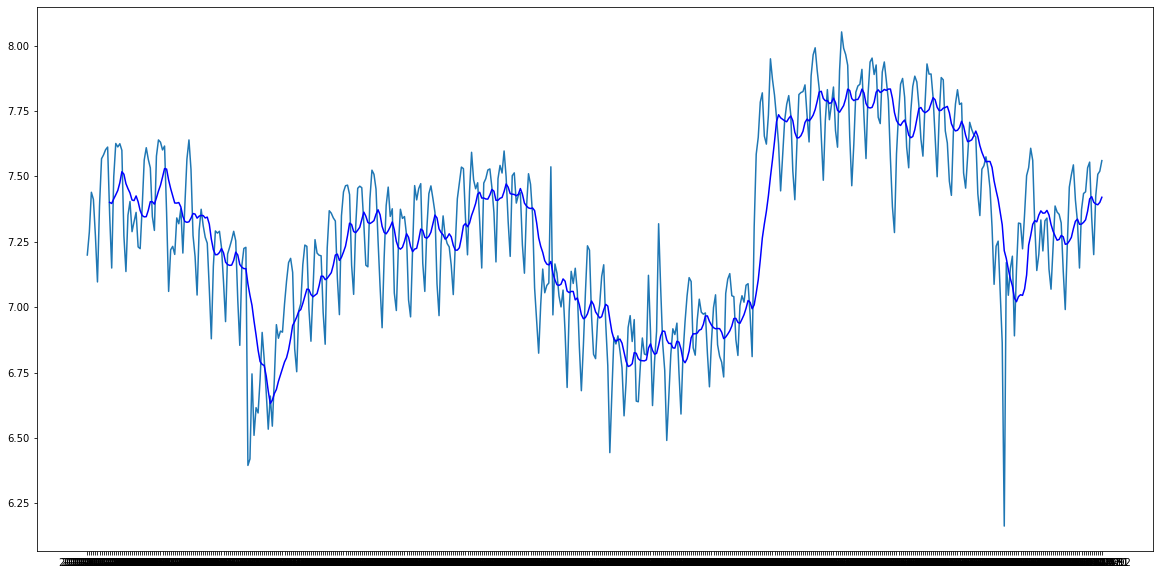

In [8]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [9]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,traffic
Date,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
2012-10-06,NaN
2012-10-07,NaN
2012-10-08,NaN
2012-10-09,NaN


In [10]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,traffic
Date,
2012-10-12,-0.049065
2012-10-13,-0.246801
2012-10-14,0.084035
2012-10-15,0.196258
2012-10-16,0.166284


In [11]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['traffic'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

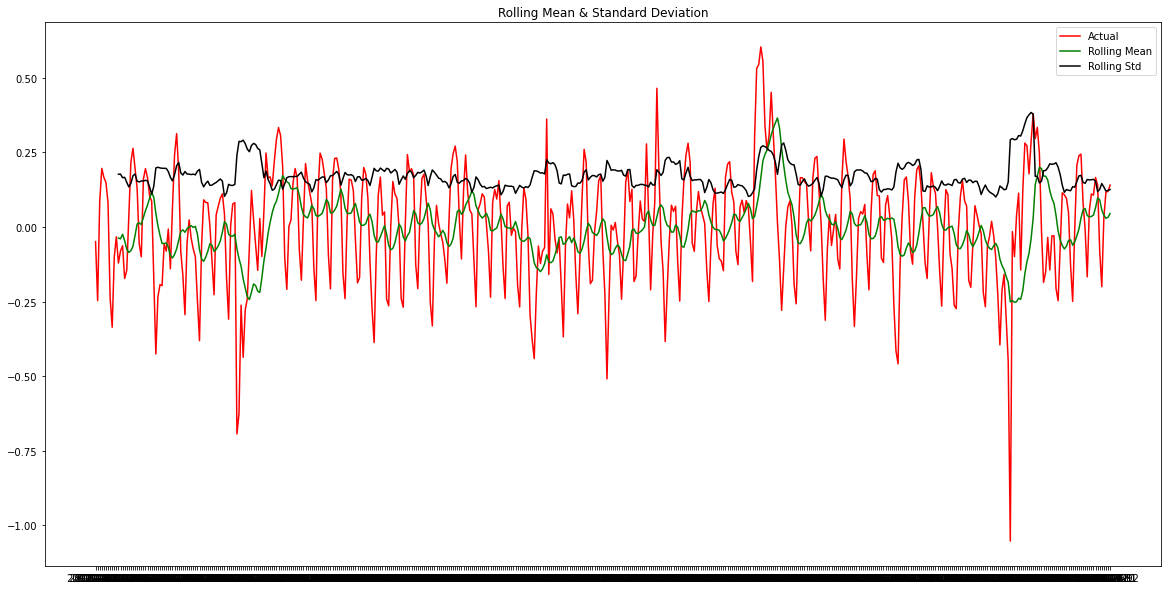

Dickey-Fuller Test: 
Test Statistic           -5.386823
p-value                   0.000004
Lags Used                15.000000
No. of Obs              473.000000
Critical Value (1%)      -3.444251
Critical Value (5%)      -2.867670
Critical Value (10%)     -2.570035
dtype: float64


In [12]:
stationarity(data_log_diff)

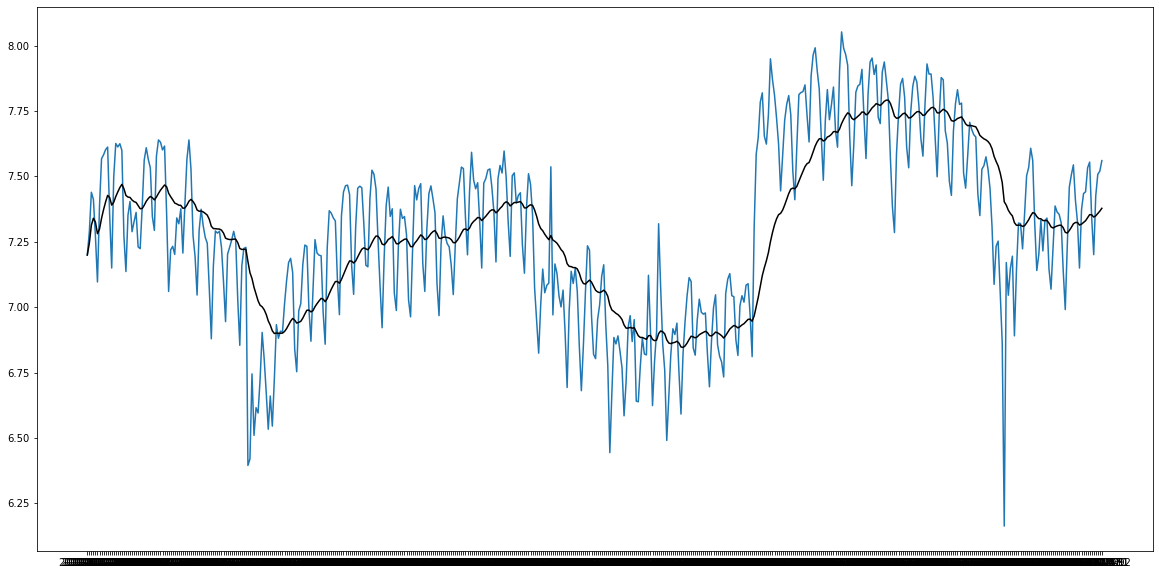

In [13]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

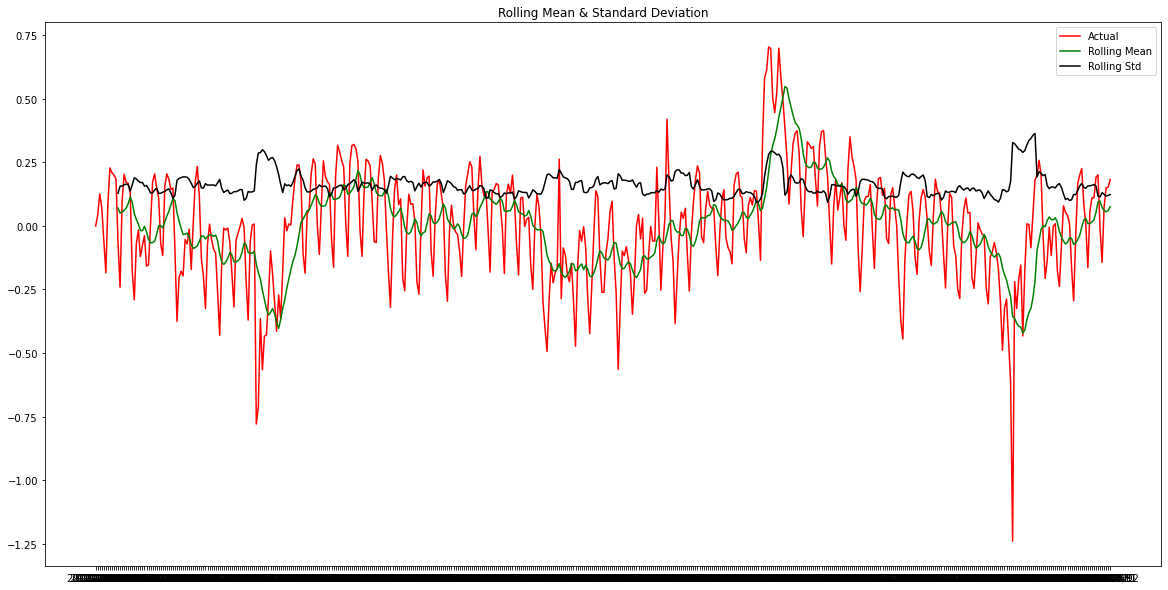

Dickey-Fuller Test: 
Test Statistic           -3.440792
p-value                   0.009644
Lags Used                15.000000
No. of Obs              484.000000
Critical Value (1%)      -3.443933
Critical Value (5%)      -2.867530
Critical Value (10%)     -2.569961
dtype: float64


In [14]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

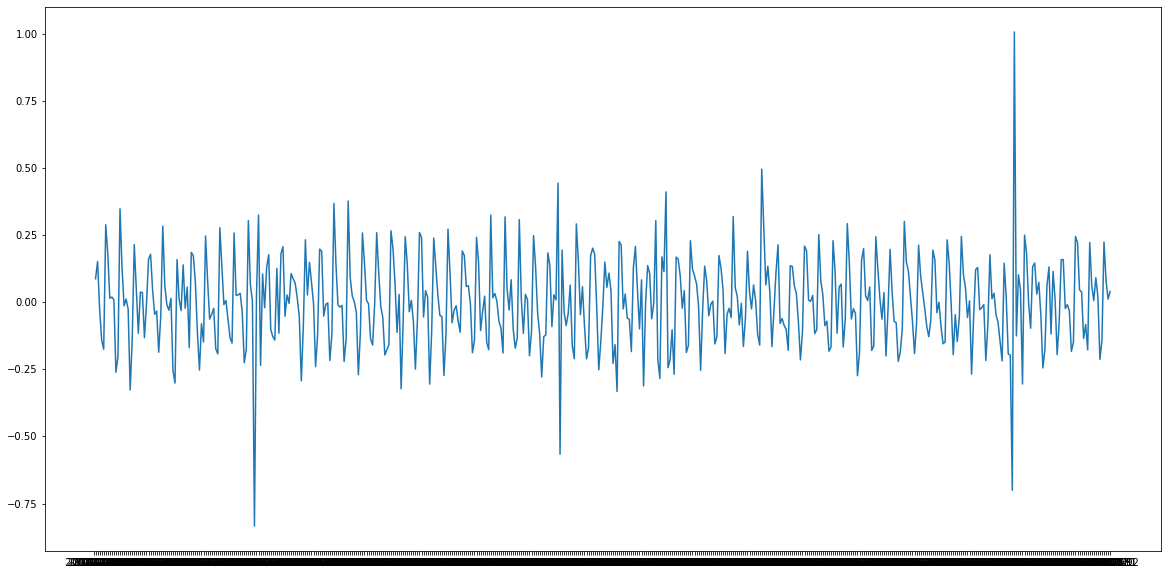

In [15]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

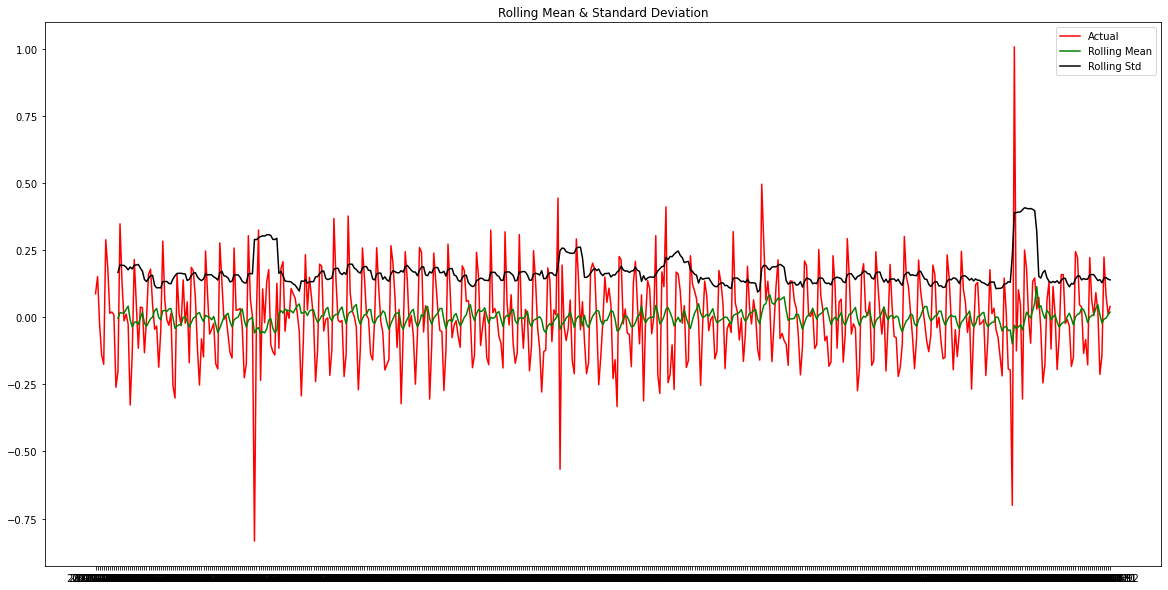

Dickey-Fuller Test: 
Test Statistic         -6.701169e+00
p-value                 3.886011e-09
Lags Used               1.800000e+01
No. of Obs              4.800000e+02
Critical Value (1%)    -3.444047e+00
Critical Value (5%)    -2.867580e+00
Critical Value (10%)   -2.569987e+00
dtype: float64


In [16]:
data_shift=data_shift.dropna()
stationarity(data_shift)

Text(0.5, 1.0, 'Partial Autocorrelation Function')

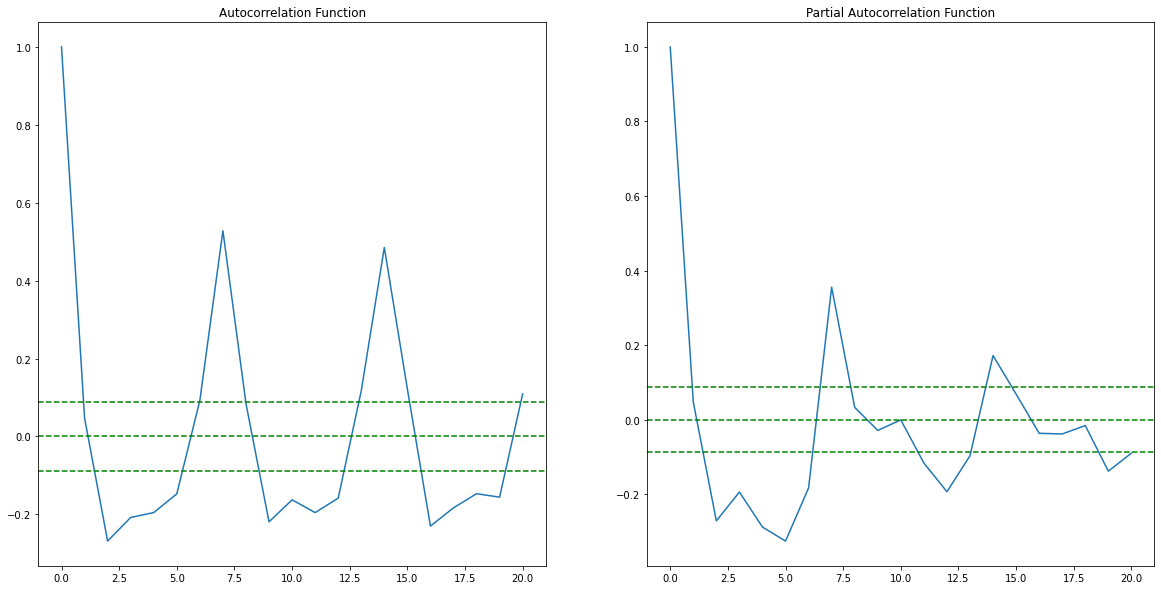

In [17]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

In [18]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA

P = [1,6,8,13,15]
Q = [1,6,8,13,15]

In [46]:
# plt.figure(figsize=(20,10))
for p in P:    
    model=ARIMA(data_log.dropna(), order=(p,1,1))
    results=model.fit(disp=-1)
# plt.plot(data_shift)
# plt.plot(results.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['traffic'])**2))
    print(p,'RSS: %.4f'% sum((results.fittedvalues-data_shift['traffic'])**2))

1 RSS: 12.3873
6 RSS: 9.2033
8 RSS: 8.5126
13 RSS: 7.9411
15 RSS: 7.7524


In [28]:
model=ARIMA(data_log.dropna(), order=(1,1,1))
results=model.fit(disp=-1)

In [29]:
sum((results.fittedvalues-data_shift['traffic'])**2)

12.387343616652954

array([7.51843292, 7.49265501, 7.47693105, 7.46737427, 7.46160048,
       7.45814721, 7.45611736, 7.45496064, 7.45433952, 7.45404693,
       7.45395586, 7.45398842, 7.4540968 , 7.45425169, 7.45443512,
       7.45463605, 7.45484771, 7.45506596, 7.45528825, 7.45551301,
       7.4557393 , 7.45596652, 7.45619431, 7.45642245, 7.4566508 ,
       7.45687929, 7.45710786, 7.45733648, 7.45756513, 7.4577938 ,
       7.45802248, 7.45825116, 7.45847985, 7.45870855, 7.45893724,
       7.45916594, 7.45939463, 7.45962333, 7.45985203, 7.46008073,
       7.46030942, 7.46053812, 7.46076682, 7.46099552, 7.46122421,
       7.46145291, 7.46168161, 7.46191031, 7.462139  , 7.4623677 ,
       7.4625964 , 7.4628251 , 7.46305379, 7.46328249, 7.46351119,
       7.46373989, 7.46396858, 7.46419728, 7.46442598, 7.46465468,
       7.46488337, 7.46511207, 7.46534077, 7.46556947, 7.46579816,
       7.46602686, 7.46625556, 7.46648426, 7.46671295, 7.46694165,
       7.46717035, 7.46739905, 7.46762774, 7.46785644, 7.46808

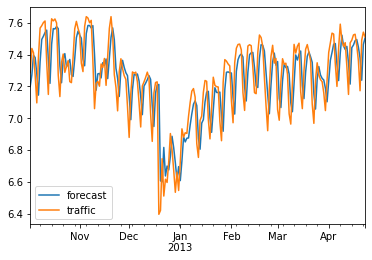

In [33]:
results.plot_predict(1,204)
x=results.forecast(steps=120)
x[0]

In [34]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Date
2012-10-02    0.000229
2012-10-03   -0.015335
2012-10-04   -0.043337
2012-10-05   -0.030015
2012-10-06    0.007436
dtype: float64


In [35]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Date
2012-10-02    0.000229
2012-10-03   -0.015106
2012-10-04   -0.058444
2012-10-05   -0.088459
2012-10-06   -0.081023
dtype: float64


In [42]:
predictions_log=pd.Series(data_log['traffic'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()


Date
2012-10-01    7.199678
2012-10-02    7.287789
2012-10-03    7.424453
2012-10-04    7.353717
2012-10-05    7.183245
dtype: float64

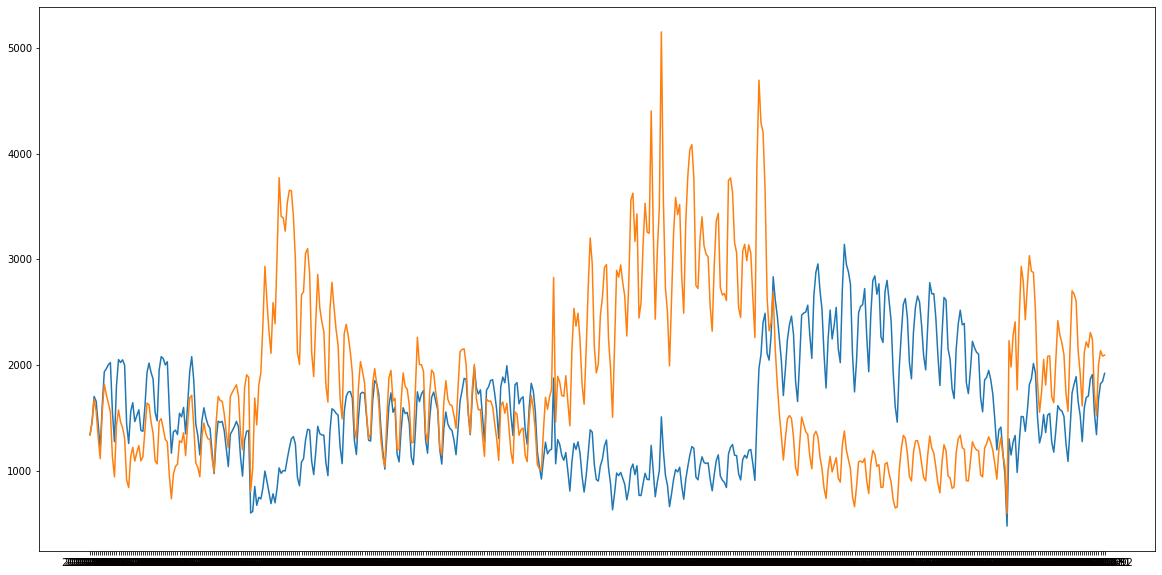

In [43]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

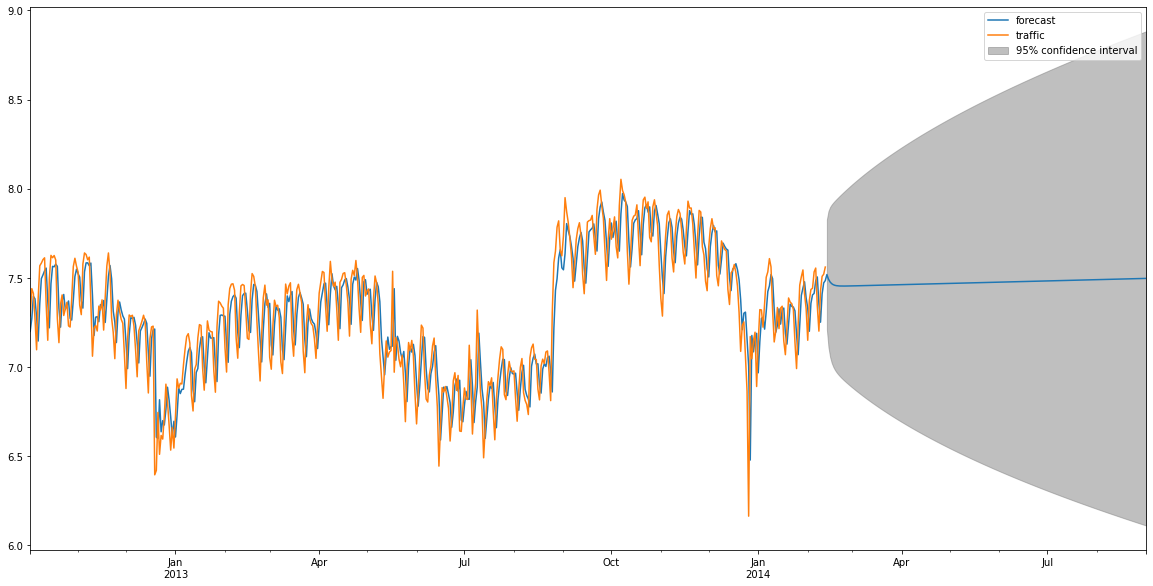

In [49]:

rcParams['figure.figsize']=20,10
results.plot_predict(1,700)
x=results.forecast(steps=120)

In [59]:
for p in P:
    for q in Q:    
        model=ARIMA(data_log.dropna(), order=(1,1,q))
        results=model.fit(disp=-1)
    # plt.plot(data_shift)
    # plt.plot(results.fittedvalues, color='red')
    # plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['traffic'])**2))
        print(p, q,'RSS: %.4f'% sum((results.fittedvalues-data_shift['traffic'])**2))

1 1 RSS: 12.3873
1 6 RSS: 11.1016
1 8 RSS: 9.7364
1 13 RSS: 9.3531
1 15 RSS: 8.9842
6 1 RSS: 12.3873
6 6 RSS: 11.1016
6 8 RSS: 9.7364
6 13 RSS: 9.3531
6 15 RSS: 8.9842
8 1 RSS: 12.3873
8 6 RSS: 11.1016
8 8 RSS: 9.7364
8 13 RSS: 9.3531
8 15 RSS: 8.9842
13 1 RSS: 12.3873
13 6 RSS: 11.1016
13 8 RSS: 9.7364
13 13 RSS: 9.3531
13 15 RSS: 8.9842
15 1 RSS: 12.3873
15 6 RSS: 11.1016
15 8 RSS: 9.7364
15 13 RSS: 9.3531
15 15 RSS: 8.9842
